In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import molsysmt as msm
from simtk import unit

# Dihedral angles

Lets load a molecular system to illustrate how MolSysMT works with the dihedral angles:

In [3]:
molecular_system = msm.demo_systems.files['pentalanine.h5']
molecular_system = msm.convert(molecular_system, to_form='molsysmt.MolSys')

In [4]:
msm.info(molecular_system)

form,n_atoms,n_groups,n_components,n_chains,n_molecules,n_entities,n_peptides,n_frames
molsysmt.MolSys,62,7,1,1,1,1,1,5000


## How to get any dihedral angle

A dihedral angles is defined by three vectors $\vec{O_1E_1}$, $\vec{O_2E_2}$ y $\vec{O_3E_3}$, where $O_i$ and $E_i$ are the origin and end points of vector $i$. In molecular physics, a dihedral angle is a degree of freedom defined by three consecutive covalent bonds $\vec{O_1O_2}$, $\vec{O_2O_3}$, $\vec{O_3E_3}$ where in this context $O_1$, $O_2$, $O_3$ and $E_3$ are the position of the atoms defining the covalent chain. Thus, before showing how the dihedral angles are computed with `molsysmt.dihedral_angles`, lets have a look to the section 'How to get the covalent chains' where the method `molsysmt.covalent_chains` is introduce.

Lets first get all 4 atoms sequences in our molecular system covalently bound with the following names and order: C-N-CA-CB.

In [5]:
covalent_chains = msm.covalent_chains(molecular_system, chain=["C", "N", "CA", "CB"])

Lets take the first C-N-CA-CB atoms chain found in our molecular system: 

In [6]:
covalent_chains[0]

array([ 4,  6,  8, 10])

The dihedral angle defined by the three consecutive vectors made by these atoms can be calculated as: 

In [7]:
dihedral_angles = msm.get_dihedral_angles(molecular_system, quartets=[4,6,8,10])

In [8]:
dihedral_angles

Quantity(value=array([[ 98.34491385],
       [ 94.94353751],
       [ 64.97497876],
       ...,
       [102.98810933],
       [ 83.29423113],
       [ 83.7205237 ]]), unit=degree)

The output object is a numpy array with shape: (n_frames, n_angles). As it can be checked in XXX, angles in MolSysMT are expressed in degrees.

In [9]:
dihedral_angles.shape

(5000, 1)

The input argument `quartets` accepts more than a 4-atoms covalent chain. Lets add the second sequence C-N-CA-CB found in our system:

In [10]:
covalent_chains[1]

array([14, 16, 18, 20])

In [11]:
dihedral_angles = msm.get_dihedral_angles(molecular_system, quartets=[[4,6,8,10],[14,16,18,20]])

In [12]:
dihedral_angles.shape

(5000, 2)

Or we can as for every dihedral angle defined by a numpy array as the one stored in the variable `covalent_chains` in specific frame indices:

In [13]:
dihedral_angles = msm.get_dihedral_angles(molecular_system, quartets=covalent_chains,
                                          frame_indices=range(1000))

In [14]:
dihedral_angles.shape

(1000, 5)

## How to get the Ramachandran angles

Getting the $\phi$ and $\psi$ dihedral angles of a protein it is almost straightfoward with the above method. But to solve this task even more easily, MolSysMT includes a method called `molsysmt.ramachandran_angles`. Lets see how it works:

In [15]:
phi_chains, psi_chains, phi_angles, psi_angles = msm.ramachandran_angles(molecular_system)

The method returns four objects, the covalent chains defining the $\phi$ and $\psi$ dihedral angles and two additional objects with the corresponding values for each angle per frame:

In [16]:
phi_chains.shape

(5, 4)

In [17]:
phi_angles.shape

(5000, 5)

The method also includes the posibility to limit the calculation of the ramachandran angles to an atoms selection over the molecular system:

In [18]:
phi_chains, psi_chains, phi_angles, psi_angles = msm.ramachandran_angles(molecular_system,
                                                                         selection='group_index==[1,2]')

Now the ramachandran map can be plot using the algorithm you like best: 

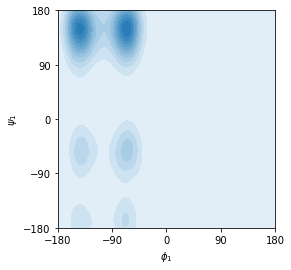

In [19]:
import seaborn as sns

ax = sns.kdeplot(phi_angles[:,0], psi_angles[:,0], shade=True)
ax.set_xlim(-180.0,180.0)
ax.set_ylim(-180.0,180.0)
ax.set_xticks([-180.0, -90.0, 0.0, 90.0, 180.0])
ax.set_yticks([-180.0, -90.0, 0.0, 90.0, 180.0])
ax.set_xlabel('$\phi_1$')
ax.set_ylabel('$\psi_1$')
ax.set_aspect('equal')

## How to change the dihedral angles of a molecular system

In [20]:
molecular_system = msm.demo_systems.metenkephalin()

In [21]:
msm.info(molecular_system)

form,n_atoms,n_groups,n_components,n_chains,n_molecules,n_entities,n_peptides,n_frames
molsysmt.MolSys,72,5,1,1,1,1,1,1


In [22]:
phi_chains, psi_chains, phi_angles, psi_angles = msm.ramachandran_angles(molecular_system)

In [23]:
print(phi_chains[2], phi_angles[0,2])

[33 35 37 53] -179.99999499104382 deg


In [24]:
msm.set_dihedral_angles(molecular_system, quartets=phi_chains[2], angles=0.0*unit.degrees)

In [25]:
msm.get_dihedral_angles(molecular_system, quartets=phi_chains[2])

Quantity(value=array([[0.]]), unit=degree)

In [26]:
new_molecular_system = msm.set_dihedral_angles(molecular_system, quartets=phi_chains[1],
                                               angles_shifts=-90.0*unit.degrees, in_place=False)

In [27]:
msm.get_dihedral_angles(molecular_system, quartets=phi_chains[1])

Quantity(value=array([[-179.99999499]]), unit=degree)

In [28]:
msm.get_dihedral_angles(new_molecular_system, quartets=phi_chains[1])

Quantity(value=array([[89.99999499]]), unit=degree)

In [29]:
view = msm.view([molecular_system, new_molecular_system])
view.clear()
view.add_licorice()
view

NGLWidget()

In [30]:
view.render_image()

Image(value=b'', width='99%')

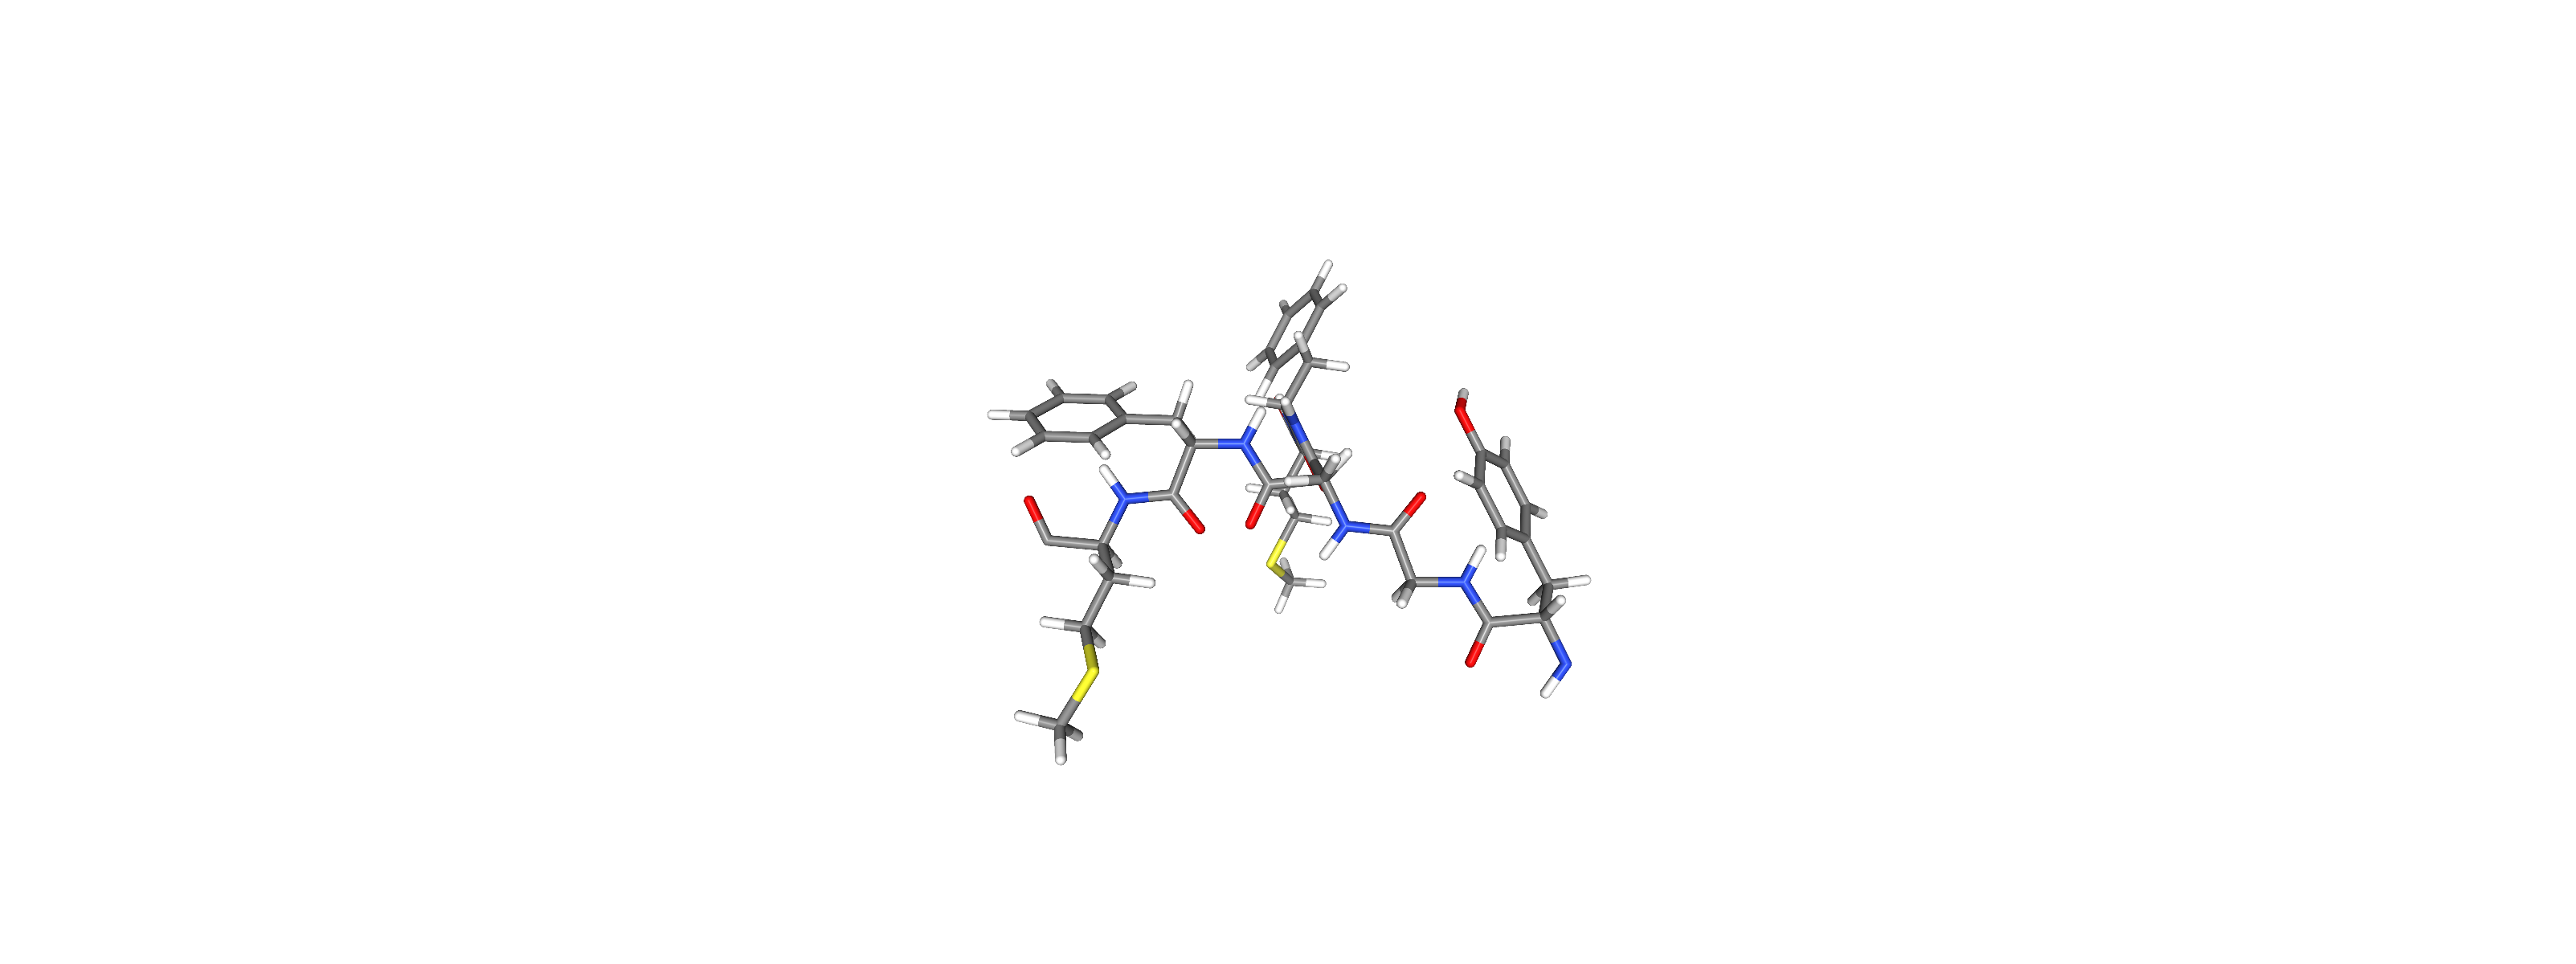

In [31]:
view._display_image()